In [160]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
API_KEY = "1e97dffc1de266459e2b00755b052c85"
URL = "http://api.openweathermap.org/data/2.5/weather"

cities = ["Alexandria,eg", "Cairo,eg", "London,uk", "Paris,fr", "Tokyo,jp", "New York,us", "Berlin,de", "Sydney,au"]

weather_data = []

for city in cities:
    response = requests.get(URL, params={"q": city, "appid": API_KEY, "units": "metric"})
    
    if response.status_code == 200:
        weather = response.json()
        weather_data.append({
            "City": city.split(",")[0],
            "Country": city.split(",")[1],
            "Temperature (°C)": weather["main"]["temp"],
            "Humidity (%)": weather["main"]["humidity"],
            "Weather": weather["weather"][0]["description"],
        })
    else:
        print(f"Failed to fetch data for {city}. Error: {response.status_code}")

df = pd.DataFrame(weather_data)

df

,City,Country,Temperature (°C),Humidity (%),Weather
0,Alexandria,eg,17.08,70,scattered clouds
1,Cairo,eg,16.42,67,haze
2,London,uk,9.38,90,light rain
3,Paris,fr,5.21,94,light rain
4,Tokyo,jp,10.84,51,broken clouds
5,New York,us,4.65,50,overcast clouds
6,Berlin,de,4.83,90,light intensity drizzle rain
7,Sydney,au,22.38,78,broken clouds


In [162]:
df.describe()

,Temperature (°C),Humidity (%)
count,8.000000,8.000000
mean,11.348750,73.750000
std,6.648734,17.310195
min,4.650000,50.000000
25%,5.115000,63.000000
50%,10.110000,74.000000
75%,16.585000,90.000000
max,22.380000,94.000000


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Temperature Across Cities')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Temperature (°C)')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Alexandria'),
  Text(1, 0, 'Cairo'),
  Text(2, 0, 'London'),
  Text(3, 0, 'Paris'),
  Text(4, 0, 'Tokyo'),
  Text(5, 0, 'New York'),
  Text(6, 0, 'Berlin'),
  Text(7, 0, 'Sydney')])

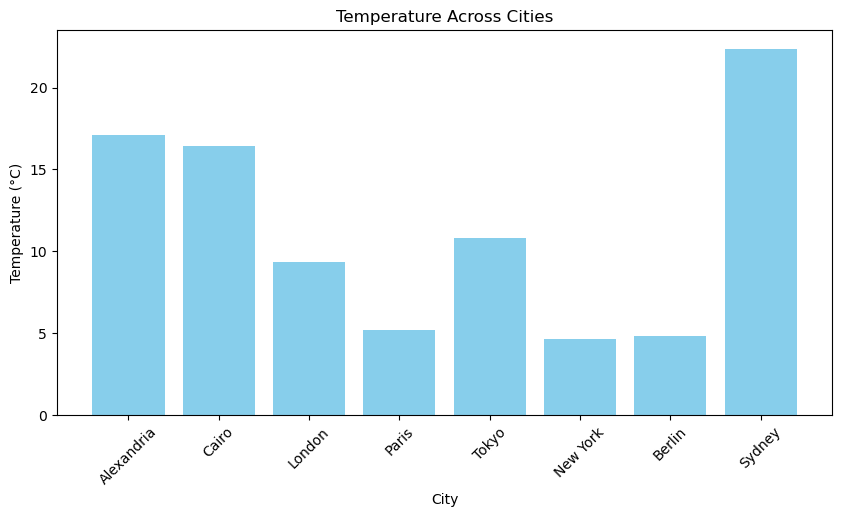

In [163]:
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Temperature (°C)'], color='skyblue')
plt.title('Temperature Across Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Humidity Across Cities')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Humidity (%)')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Alexandria'),
  Text(1, 0, 'Cairo'),
  Text(2, 0, 'London'),
  Text(3, 0, 'Paris'),
  Text(4, 0, 'Tokyo'),
  Text(5, 0, 'New York'),
  Text(6, 0, 'Berlin'),
  Text(7, 0, 'Sydney')])

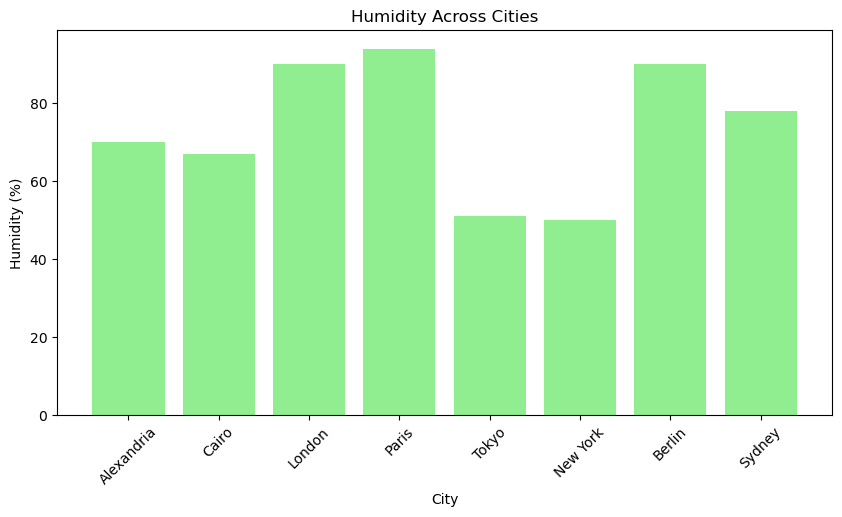

In [164]:
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Humidity (%)'], color='lightgreen')
plt.title('Humidity Across Cities')
plt.xlabel('City')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.show()